[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/CosmiX-6/Bank-data-clustering-KMean-Clustering-and-PCA/HEAD)

# **Credit Card Clustering - KMean Clusteing**

## Objectives

Using the bank credit card data we will perform Dimension Reduction and form cluster of data which acts similar.

### Problem Statement

1. <a href="#ans1">Primary analysis of several categorical features reveal</a>

2. <a href="#ans2">Exploratory Data Analysis</a>

3. <a href="#ans3">Perform dimensionality reduction using PCA such that the 95% of the variance is explained.</a>

4. <a href="#ans4">Finding the optimum value of k for k-means clustering using the elbow method. Plot the elbow curve.</a>

5. <a href="#ans5">Finding the optimum value of k for k-means clustering using the silhouette score method and specify the number of observations in each cluster using a bar plot.</a>

## **Data Description**

## *Credit card data:*

1) CUSTID: Identification of Credit Card holder (Categorical)

2) BALANCE: Balance amount left in their account to make purchases

3) BALANCEFREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)

4) PURCHASES: Amount of purchases made from account

5) ONEOFFPURCHASES: Maximum purchase amount done in one-go

6) INSTALLMENTSPURCHASES: Amount of purchase done in installment

7) CASHADVANCE: Cash in advance given by the user

8) PURCHASESFREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)

9) ONEOFFPURCHASESFREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)

10) PURCHASESINSTALLMENTSFREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)

11) CASHADVANCEFREQUENCY: How frequently the cash in advance being paid

12) CASHADVANCETRX: Number of Transactions made with "Cash in Advanced"

13) PURCHASESTRX: Number of purchase transactions made

14) CREDITLIMIT: Limit of Credit Card for user

15) PAYMENTS: Amount of Payment done by user

16) MINIMUM_PAYMENTS: Minimum amount of payments made by user

17) PRCFULLPAYMENT: Percent of full payment paid by user

## Importing Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
warnings.filterwarnings('ignore')

%matplotlib inline
pd.set_option('display.max_columns', 500)

## Importing Dataset

In [2]:

data = pd.read_csv('D:\TẢI XUÔNG_2\VanAnh Bank customer Churn\Bank_customer_segment-master\dataf.csv') # read the dataset file

# display the shape of dataframe
display(data.shape)

# displaying few records of the dataset
data.head()

(8950, 19)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,AccountID
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,3
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12,4
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,5


In [3]:
data.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
AccountID                             0
dtype: int64

As we can se above there are some missing data in our credit card dataset.

## Handling missing values

There are 313 missing value in `MINIMUM_PAYMENTS` feature and 1 missing value in `CREDIT_LIMIT`

Replacing missing vlaue in `MINIMUM_PAYMENTS` with median value.

In [4]:
# code to replace Nan with median value
data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].median(), inplace= True)

There is only one data missing in Credit Card which won't bother if we drop that row.

In [5]:
# drop the row from dataset
data.dropna(inplace=True)
data.shape

(8949, 19)

In [6]:
data.isna().sum().sum()

0

In [7]:
# checking for data types
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8949 entries, 0 to 8949
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8949 non-null   object 
 1   BALANCE                           8949 non-null   float64
 2   BALANCE_FREQUENCY                 8949 non-null   float64
 3   PURCHASES                         8949 non-null   float64
 4   ONEOFF_PURCHASES                  8949 non-null   float64
 5   INSTALLMENTS_PURCHASES            8949 non-null   float64
 6   CASH_ADVANCE                      8949 non-null   float64
 7   PURCHASES_FREQUENCY               8949 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8949 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8949 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8949 non-null   float64
 11  CASH_ADVANCE_TRX                  8949 non-null   int64  
 12  PURCHA

In [8]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,AccountID
count,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000
mean,1564.647593,0.877350,1003.316936,592.503572,411.113579,978.959616,0.490405,0.202480,0.364478,0.135141,3.249078,14.711476,4494.449450,1733.336511,844.999569,0.153732,11.517935,4475.418594
std,2081.584016,0.236798,2136.727848,1659.968851,904.378205,2097.264344,0.401360,0.298345,0.397451,0.200132,6.824987,24.858552,3638.815725,2895.168146,2332.906149,0.292511,1.337134,2583.919684
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000,1.000000
25%,128.365782,0.888889,39.800000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.282850,170.875613,0.000000,12.000000,2238.000000
50%,873.680279,1.000000,361.490000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,857.062706,312.343947,0.000000,12.000000,4475.000000
75%,2054.372848,1.000000,1110.170000,577.830000,468.650000,1113.868654,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.279320,788.721609,0.142857,12.000000,6713.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000,8950.000000


<div class="alert alert-warning">

<h4>For  Some  features  like  `CASH_ADVANCE`,  `ONEOFF_PURCHASES`,  `PURCHASES`  and  few  more  there was sudden increase in max value.</h4>
    
i.e <b><i>Max value is far away form the median</i></b> value which doesn't seems normal.

</div>

<div id='ans2'></div>

---
## Exploratory Data Analysis

### Numerical Variable Analysis

(array([8.508e+03, 3.450e+02, 6.700e+01, 1.600e+01, 8.000e+00, 3.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([    0.      ,  4713.721176,  9427.442352, 14141.163528,
        18854.884704, 23568.60588 , 28282.327056, 32996.048232,
        37709.769408, 42423.490584, 47137.21176 ]),
 <BarContainer object of 10 artists>)

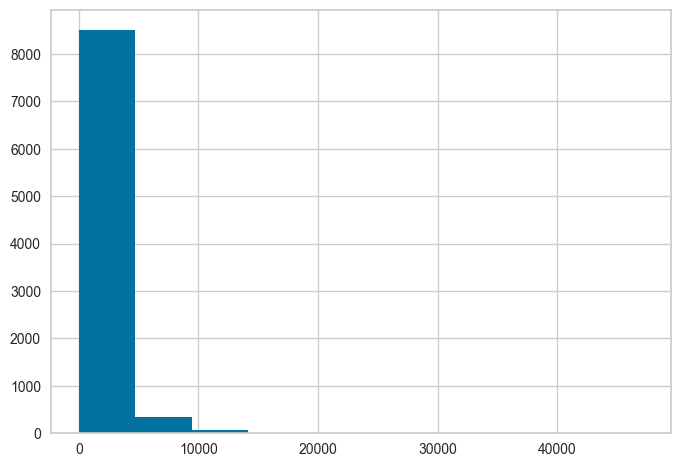

In [9]:
plt.hist(data['CASH_ADVANCE'])

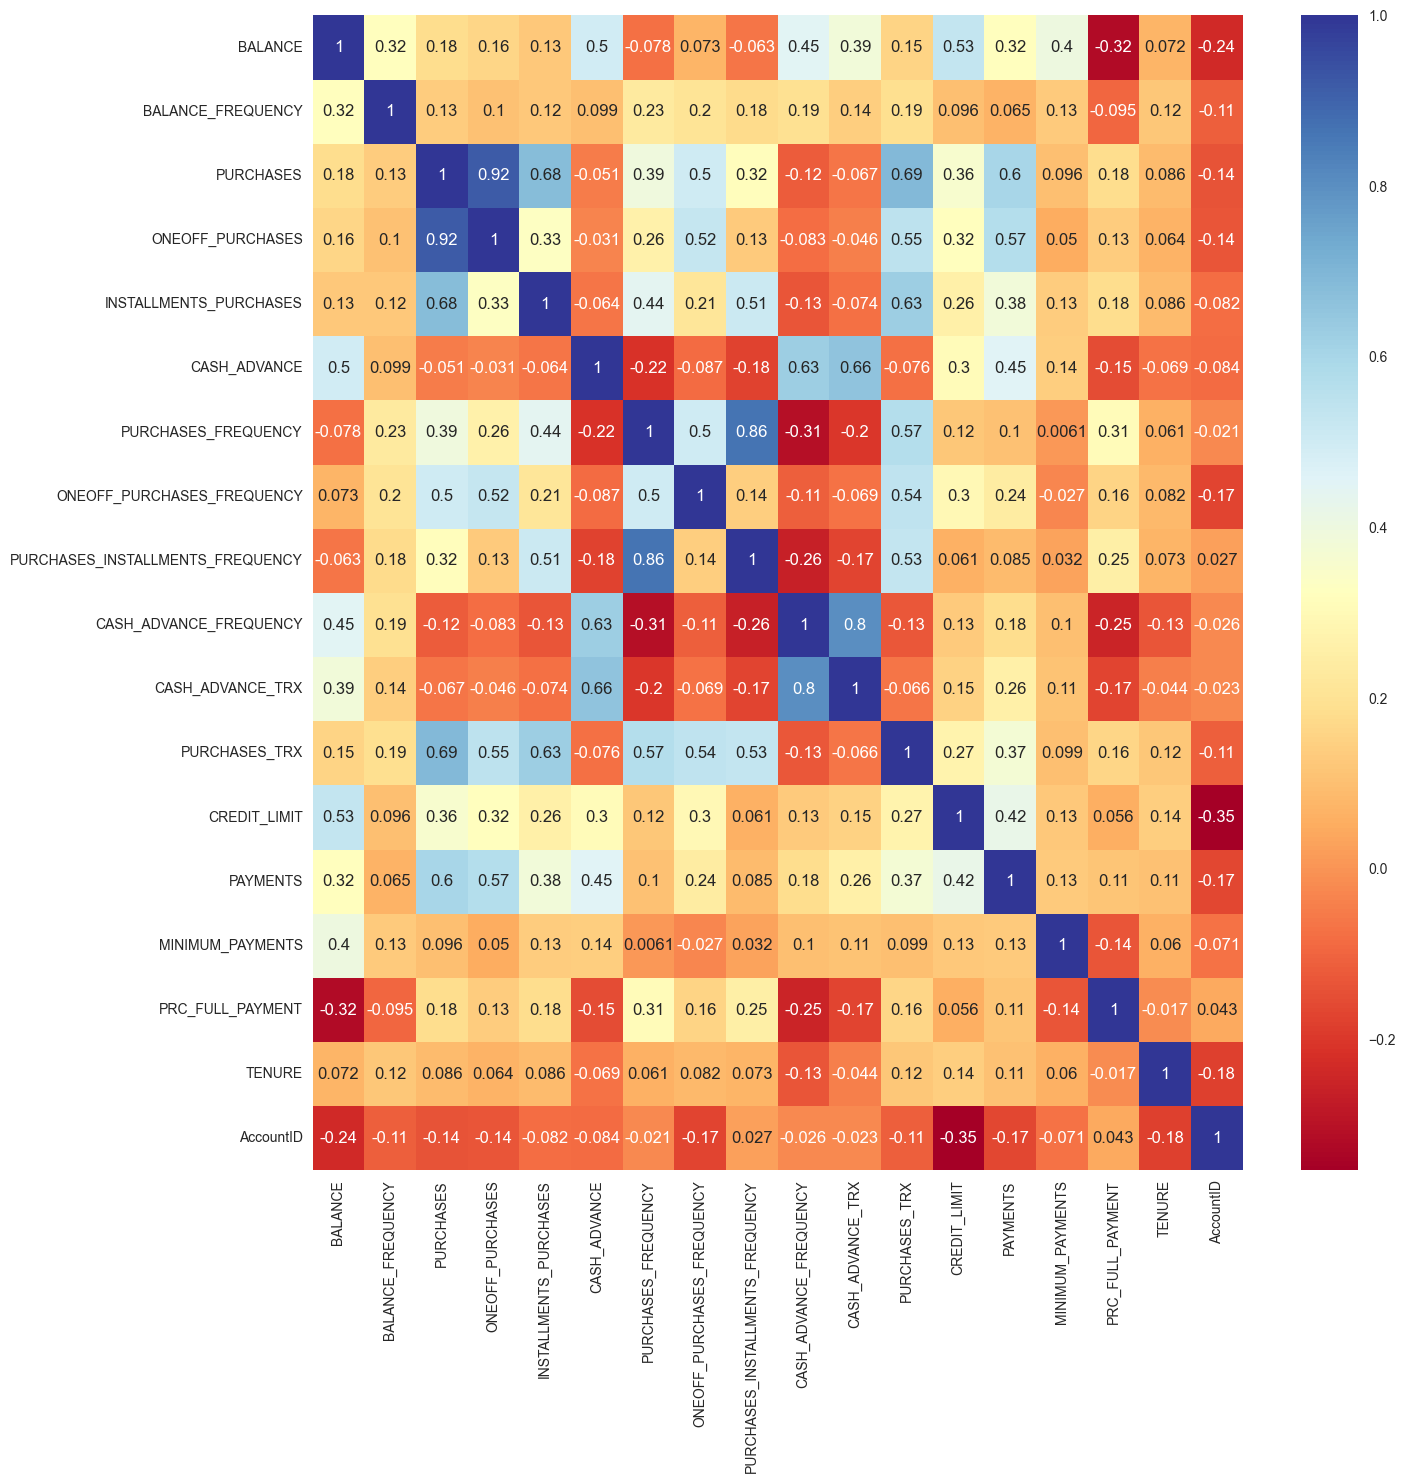

In [10]:
data_corr = data.corr()

plt.figure(figsize=(15,15))
sns.heatmap(data_corr, annot=True, cmap='RdYlBu')

plt.savefig('figure1.png')

plt.show()

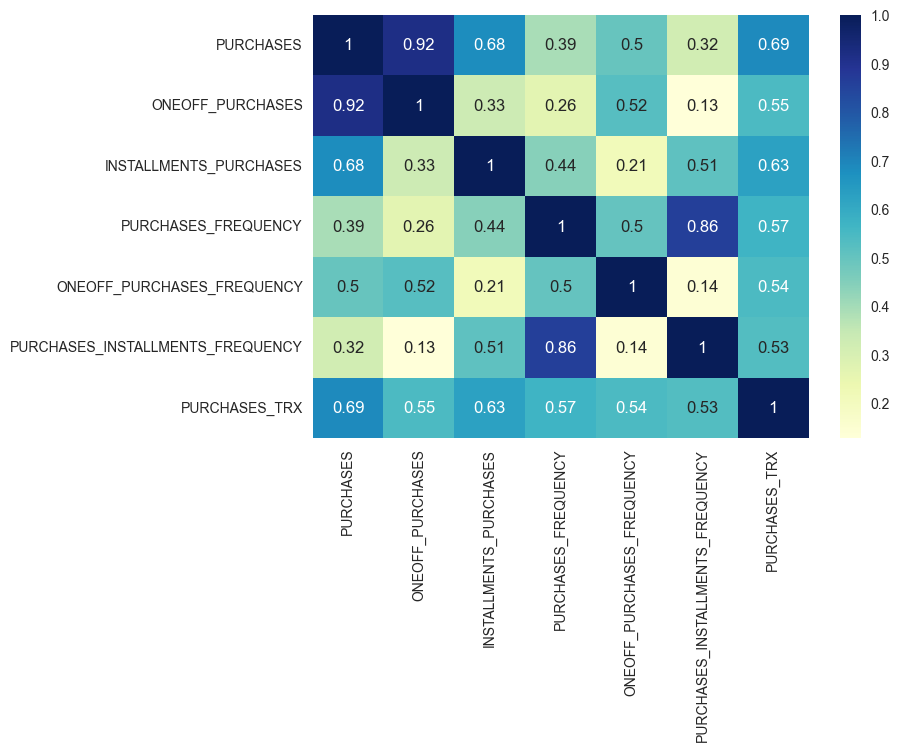

In [11]:
purchase_corr = data[[col for col in (data.columns.values) if 'purchase' in col.lower()]].corr()
sns.heatmap(purchase_corr, annot=True, cmap='YlGnBu')

plt.savefig('figure2.png')
['PURCHASES','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','PURCHASES_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY','PURCHASES_TRX']
plt.show()

In above heatmap mulicolinearity can be seen for the features with respect to `PURCHASES` and `PURCHASES_TRX`

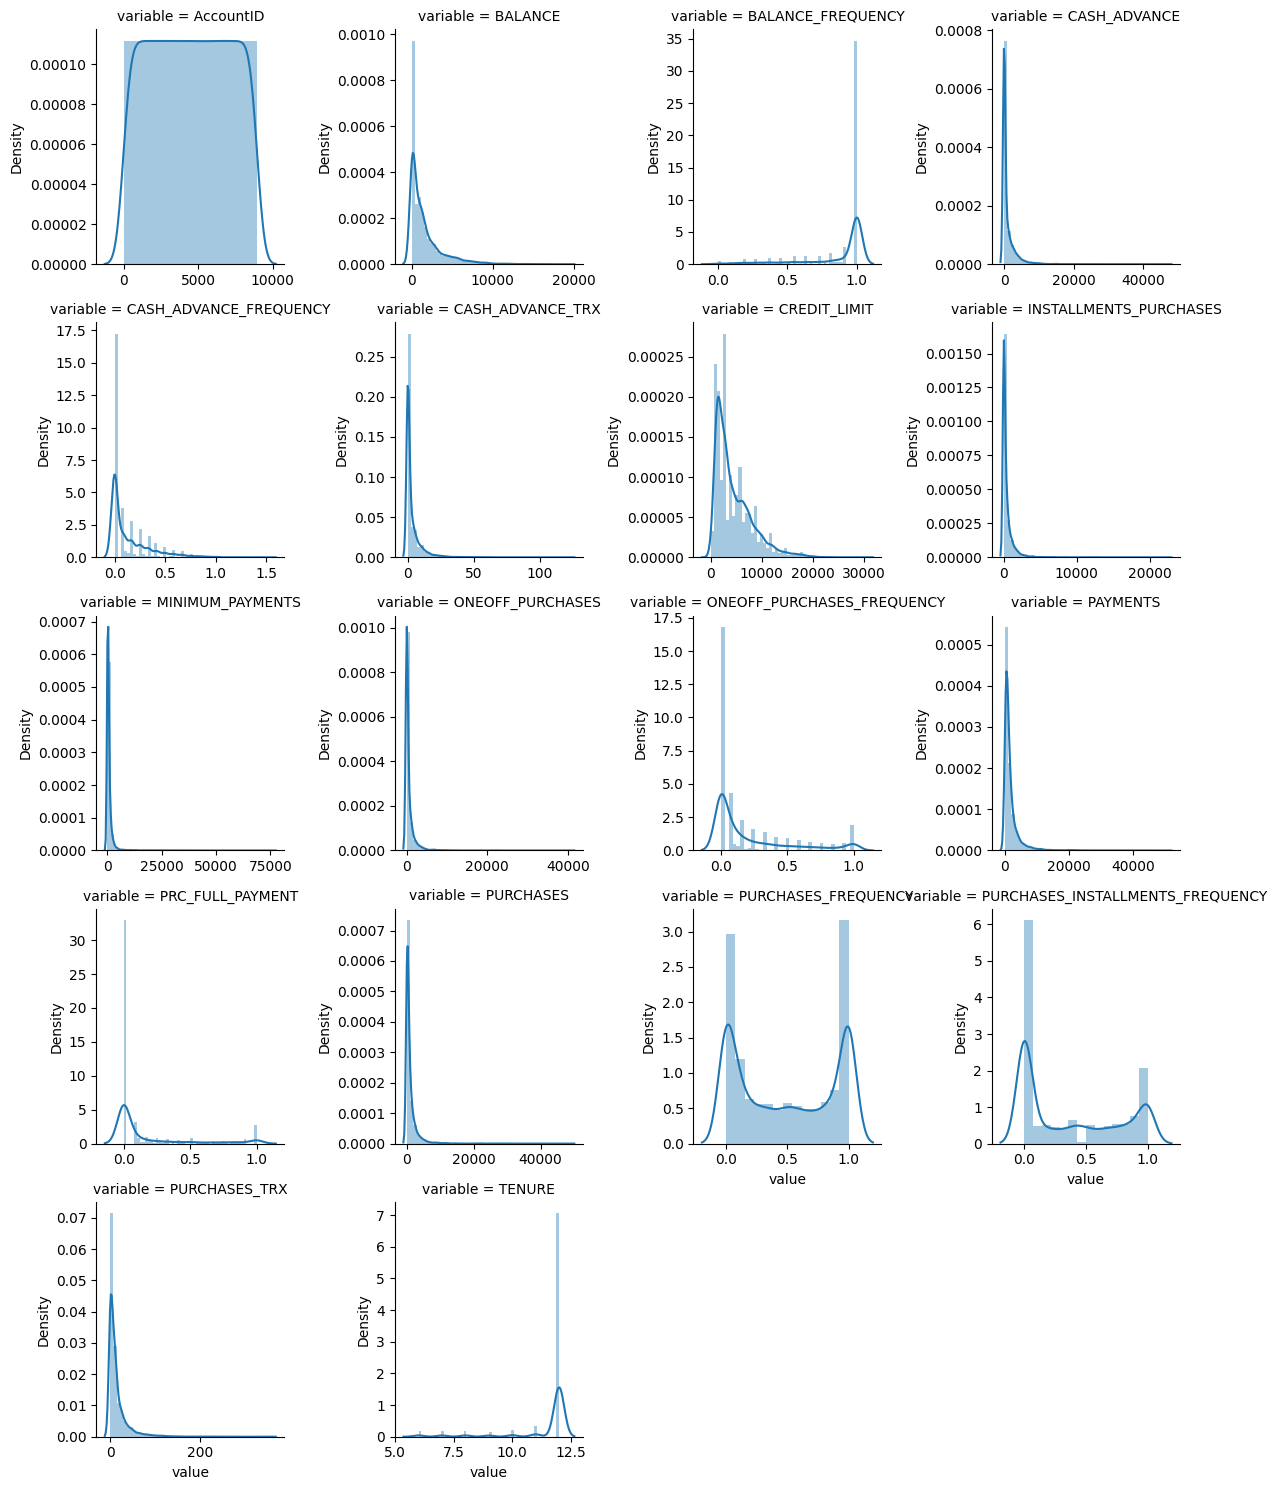

In [13]:
# Creating a distribution plot of all quantitative variable

melt_df = pd.melt(data, value_vars=sorted(data.select_dtypes(include=np.number)))
sf = sns.FacetGrid(melt_df, col='variable', col_wrap=4, sharex=False, sharey=False)
sf.map(sns.distplot, 'value')
plt.savefig('figure3.png')
plt.show()

With above figure it seems there is presence of outlier in the dataset as we can see there is positive skewed data with most distribution in 25% area of left side. Lets take it more further.

#### We have found that the `TENURE` acts like a discrete feature.

The tenure ranges from 6 months and 2 years usually for credit car emi. So we dont need it in discrete format and I would like to keep it as it is.

### Pimary Analysis

<div id='ans1' class="alert alert-success">

**Findings**    
    <ul>
        <li>Missing data found. (Missing Value Handling was Successful)</li>
        <li>Presence of outlier</li>
        <li>Data are highly correlated (Purchases often showed multicollinearity)</li>
        <li>Found Skewness in most of features (Most found Right Skewed/Positive Skewed data)</li>
        <li>found that the TENURE acts like a discrete feature</li>
    </ul>    
</div>

In [ ]:
# sns.pairplot(data)

# plt.savefig('figure4.png')

# plt.show()

In [14]:
data.drop('CUST_ID', axis=1, inplace=True)

In [15]:
data.shape

(8949, 18)

In [16]:
# Code for outlier treatment

from scipy.stats import zscore

df_new = data.copy()
for col in df_new.columns:
    df_new['zs_'+col] = zscore(df_new[col])
    
# code to filter the zscore
for col in df_new.columns[17:]:
    df_new = df_new[(df_new[col]>=-3) & (df_new[col]<=3)]
    
data = df_new.iloc[:,:17]

Using zscore here for outlier treatment will drop most of the data, This will lead to loss in information

In [17]:
data.shape

(3, 17)

---
## Data Clustering

#### Normalizing data

Before performing pca we need the data to be scaled.

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(data)

In [28]:
scaled_data = pd.DataFrame(scaler.transform(X),columns=data.columns)

In [20]:
X_mean = np.mean(X, axis=0)
cov_mat = (X - X_mean).T.dot((X - X_mean)) / (X.shape[0]-1)

In [21]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

In [22]:
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

In [23]:
k=0
num_=[]
            
for i in eig_pairs:
    k=k+1
    num_.append(k)

tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

In [24]:
cum_var_exp=pd.DataFrame(
            {    'n_component':num_,
                "Explained variance":cum_var_exp})

In [37]:
pca = PCA(n_components=3)
column=["feature_"+str(i) for i in range(1, 4)]
pca.fit(scaled_data)
pca_data = pd.DataFrame(pca.transform(scaled_data), columns=column)

ValueError: n_samples=3 should be >= n_clusters=4.

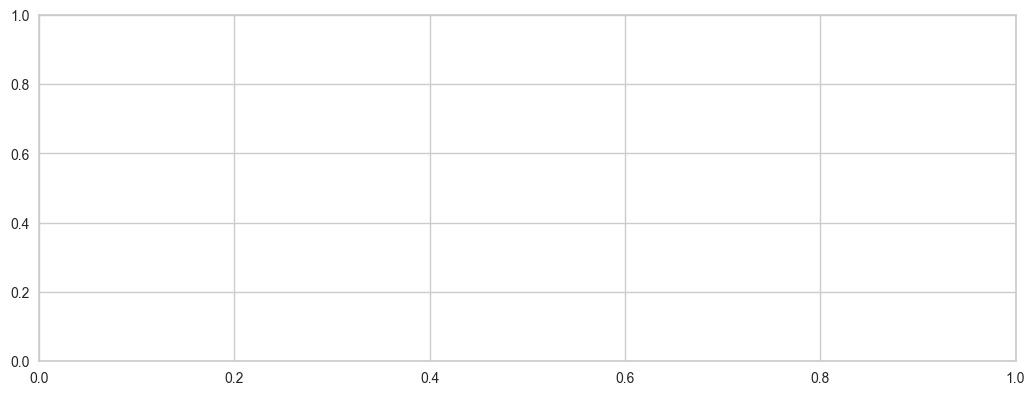

In [39]:
from yellowbrick.cluster import KElbowVisualizer

fige, axes = plt.subplots(figsize=(20, 8))

elbow = KElbowVisualizer(KMeans(), k=10, timings=False, locate_elbow=True, size=(1260, 450))
data1 = StandardScaler().fit_transform(scaled_data)
elbow.fit(scaled_data)

axes.set_xlabel("\nK", fontsize=20)
axes.set_ylabel("\nDistortion Score", fontsize=20)

sns.despine(left=True, bottom=True)
plt.plot()


### Dimensionality Reduction

## PCA - Principal component Analysis

PCA is an unsupervised Machine Learning algorithm which tries to reduce the dimension of data and also preserve the original information on the same time.

In [ ]:
# from sklearn.decomposition import PCA

# pca = PCA(n_components=17)
# pca.fit(scaled_data)

In [ ]:
# np.cumsum(pca.explained_variance_ratio_)[11]

0.9659412550088523

<div id='ans3' class="alert alert-success">
<p><font size="3px">We found that pca explains the variance ratio of <font size="5px"><b>95%</b></font> with n component<font size="5px"><b>11</b></font> </font></p>
</div>

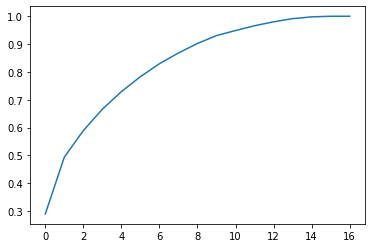

In [ ]:
plt.plot(pca.explained_variance_ratio_.cumsum())

plt.savefig('figure5.png')

plt.show()

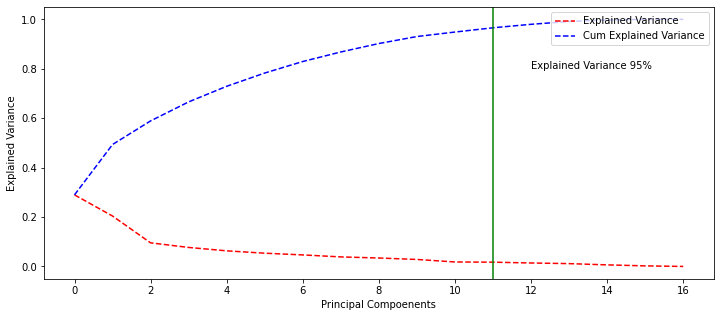

In [ ]:
plt.figure(figsize=(12,5))

sns.lineplot(np.arange(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_, linestyle= "--", color= 'red', markers= True, label= 'Explained Variance')
sns.lineplot(np.arange(len(pca.explained_variance_ratio_)), np.cumsum(pca.explained_variance_ratio_), linestyle= "--", color= 'blue', markers= True, label= 'Cum Explained Variance')

plt.xlabel('Principal Compoenents')
plt.ylabel('Explained Variance')
plt.legend(loc=1)

plt.axvline(11, color='green')
plt.text(12, 0.8, 'Explained Variance 95%')

plt.savefig('figure6.png')

plt.show()

In [ ]:
pca.get_params()

{'copy': True,
 'iterated_power': 'auto',
 'n_components': 17,
 'random_state': None,
 'svd_solver': 'auto',
 'tol': 0.0,
 'whiten': False}

In [ ]:
pca = PCA(n_components = 11)
X_data = pca.fit_transform(scaled_data)

## KMean Clustering

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
silhouette_scores = []
data_points = []

for i in range(2,25):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X_data)
    data_points.append(kmeans.inertia_)
    
    # shilhouette score
    label = kmeans.labels_
    silhouette_scores.append(silhouette_score(X_data, label))

<div id='ans4'></div>

## Kmean Plot - Elbow Method

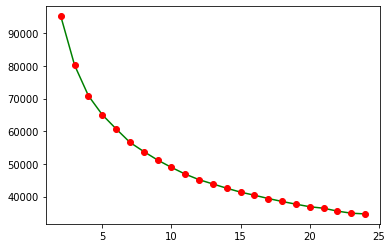

In [ ]:
plt.plot(np.arange(2,25,1), data_points, color='green')
plt.plot(np.arange(2,25,1), data_points, 'ro')

plt.savefig('figure7.png')

plt.show()

We can see the elbow forming at 5-7 lets check in silhouette for more clarity

<div id='ans5'></div>

### Silhouette Plot

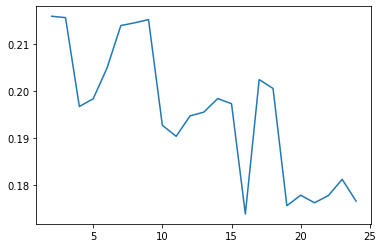

In [ ]:
plt.plot(np.arange(2,25,1), silhouette_scores)

plt.savefig('figure8.png')

plt.show()

Using silhouette score we have choosen the n cluster = 5

In [ ]:
kmeans= KMeans(n_clusters=5)
kmeans.fit(X_data)

KMeans(n_clusters=5)

In [ ]:
labels= kmeans.labels_
labels

array([3, 4, 2, ..., 3, 1, 3])

In [ ]:
pca = PCA(n_components=11)
data_kmean = pca.fit_transform(data)

In [ ]:
data_kmean.shape

(7434, 11)

In [ ]:
cluster_data = pd.DataFrame(data = data_kmean)
cluster_data['labels'] = labels
cluster_data.head()

,0,1,2,3,4,5,6,7,8,9,10,labels
0,-3542.629635,-497.235661,-430.733972,164.655730,17.653782,-103.191755,30.281457,-3.011984,-0.211563,-1.006434,-0.390223,3
1,4504.439686,4493.152615,235.949832,3480.374961,-1466.074578,452.138405,115.938218,1.023691,0.091637,-10.421775,-0.681152,4
2,3334.397295,-826.138000,-1328.731394,-967.669687,236.410718,-531.806663,210.355200,1.248045,-0.134969,-0.985428,-0.089570,2
3,3148.929689,-1674.690571,-1024.171458,-1071.250467,-915.472937,-438.549844,484.066428,-15.579806,0.079980,0.041868,-0.329395,3
4,-3062.761386,121.517690,-313.115359,-41.277523,383.395195,-406.469927,-16.118333,-2.687777,-0.169290,-1.314273,-0.321572,3


### The number of observations in each cluster

In [ ]:
bar_plot = cluster_data.groupby('labels').count()[0]

In [ ]:
bar_plot.values

array([1067, 1889, 1008, 2374, 1096], dtype=int64)

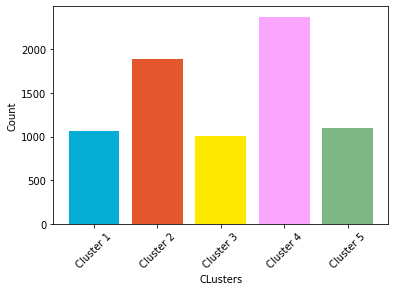

In [ ]:
plt.bar(bar_plot.index, bar_plot.values, color=['#06AED5', '#E4572E', '#FFE900', '#FAA6FF', '#7FB685'])

a= plt.xticks([0,1,2,3,4], ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5'], rotation=45)
plt.xlabel('CLusters')
plt.ylabel('Count')

plt.savefig('figure9.png')

plt.show()

## Conclusion_

The aim of acitivty to reduce the dimension of dataset using pca and creating the cluster for credit card data is successfully implemented.

<h3>Author</h3>
<h4>Akash Sharma</h4>
<div style="float:left">
  <a href="https://www.linkedin.com/in/akash-sharma-01775b14a">
    <img src="https://img.shields.io/badge/LinkedIn-0077B5?style=for-the-badge&logo=linkedin&logoColor=white" alt="LinkedIn">
  </a>
  <a href="https://discord.com/users/366283102462541865">
    <img src="https://img.shields.io/badge/Discord-7289DA?style=for-the-badge&logo=discord&logoColor=white" alt="Discord">
  </a>
  <a href="https://github.com/CosmiX-6">
    <img src="https://img.shields.io/badge/GitHub-100000?style=for-the-badge&logo=github&logoColor=white" alt="GitHub">
  </a>
</div>

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/CosmiX-6/Bank-data-clustering-KMean-Clustering-and-PCA/HEAD)